In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from sklearn.preprocessing import StandardScaler, Binarizer, LabelEncoder, Normalizer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pipe

# Preprocessing Pipeline, uveitis_data.xlsx

In [2]:
# import dataframe
df = pd.read_excel("../data/uveitis_data.xlsx")
assert len(df) >= 1075, "Data is not complete"

df = pipe.rename(df, "../data/col_names&data_type-Copy1.xlsx")

# def function 
    # get list of categorical variables
    # split if numeric and categorical is both included
    # transform d type to categorical
    # encode   

In [3]:
def dtype_transform(df, path):
    '''
    Converts zero values recorded as text to NaN's. 
    
    Arguments
    ---------
    
    Returns
    -------
    '''
    # remove leading or trailing whitespace in all categorical or text features
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    return df

df = dtype_transform(df, "../data/col_names&data_type-Copy1.xlsx")

In [4]:
def val_to_nan():
    '''
    
    
    Arguments
    ---------
    df: df, Original DataFrame
    path: str, Path to excel-file with dtypes linked to features
    
    Returns
    -------
    df: df, Returns original DataFrame with changed dtypes
    '''

In [5]:
# transform categorical data

# gender
df.gender = df.gender.astype('category')

**Feature Race**
The categorical variable "Race" includes the category "race or ethnic group data not provided by source". These values are treated as missing values, since they do not contain any information about the respective person. 

In [6]:
df.race = df.race.replace('Race or Ethnic Group Data Not Provided by Source',np.NaN)
df.race = df.race.astype('category')

In [7]:
df['loc'] = df['loc'].str.lower().astype('category')

In [8]:
df.cat = df.cat.str.lower().astype('category')

In [9]:
df.specific_diagnosis = df.specific_diagnosis.str.lower().astype('category')

In [10]:
df.notes.value_counts(dropna=False)

NaN              850
pars planitis    142
WDS               80
lymphoma           2
PIC                1
Name: notes, dtype: int64

todo: describe change with 'c'

In [11]:
col = ['ac_abn_od_cells', 'ac_abn_os_cells', 'vit_abn_od_cells',
       'vit_abn_os_cells', 'vit_abn_od_haze', 'vit_abn_os_haze']
for c in col: 
    # replace 'C' (for missing) with NaN
    df[c] = df[c].replace('C',np.nan)
    df[c] = df[c].astype('float')
    df[c] = pd.Categorical(values=df[c], categories=df[c].unique().sort(), ordered=True)

In [12]:
col = ['hbc__ab', 'hbs__ag', 'hcv__ab']
for c in col:
    df[c] = df[c].str.lower()
    df.loc[df[c] == 'negative', c] = 0
    df.loc[df[c] == 'see note | positive result s/co ratio is >5.0.  confirmatory testing i', c] = 1
    df.loc[df[c] == 'see below | positive result s/co ratio is >5.0.  confirmatory testing', c] = 1
    df.loc[df[c] == 'reactive', c] = 1
    df.loc[df[c] == 'repeat reactive', c] = 1
    df.loc[df[c] == 'invalid result', c] = np.nan
    df.loc[df[c] == 'note:', c] = np.nan
    df[c] = df[c].astype('category')

In [13]:
numeric_features = []
categorical_features = []
imputer = {'categorical':{'strategy':'constant', 'fill_value':'missing'}, 'numerical':{'strategy':'median'}}
# preprocessor = pipe.preprocessing(categorical_features, numeric_features, imputer)

In [14]:
df_test = df.loc[:,"calcium":]
df_test.columns

Index(['calcium', 'uom', 'range', 'lactate_dehydrogenase', 'uom1', 'range1',
       'c-reactive_protein,_normal_and_high_sensitivity', 'uom2', 'range2',
       'wbc',
       ...
       'range34', 'proteinase-3_antibodies', 'uom35', 'range35',
       'rheumatoid_factor', 'uom36', 'range36', 'hbc__ab', 'hbs__ag',
       'hcv__ab'],
      dtype='object', length=103)

Unique values before transformation:
[2.27 2.32 2.44 2.45 2.28 2.36 2.23 2.29 2.25 2.3 2.33 2.4 2.34 2.46 2.22
 2.38 2.31 2.42 2.13 2.18 2.47 2.24 2.15 2.49 2.53 2.37 2.61 2.21 2.39
 2.14 2.19 2.2 2.6 2.51 1.76 2.35 2.43 2.41 2.5 2.09 2.26 2.16 2.17 2.52
 2.48 2.63 2.08 2.59 2.81 2.07 2.56 nan 2.54 2.12 1.87 2.06 2.55 2.57 2.58
 1.9 2.1 2.7 3.04 2.75 2.11 2.62 2.04 'HEMOLYZED|2.30' 2.01 2.64]
Unique values after transformation:
[2.27 2.32 2.44 2.45 2.28 2.36 2.23 2.29 2.25 2.3  2.33 2.4  2.34 2.46
 2.22 2.38 2.31 2.42 2.13 2.18 2.47 2.24 2.15 2.49 2.53 2.37 2.61 2.21
 2.39 2.14 2.19 2.2  2.6  2.51 1.76 2.35 2.43 2.41 2.5  2.09 2.26 2.16
 2.17 2.52 2.48 2.63 2.08 2.59 2.81 2.07 2.56  nan 2.54 2.12 1.87 2.06
 2.55 2.57 2.58 1.9  2.1  2.7  3.04 2.75 2.11 2.62 2.04 2.01 2.64]


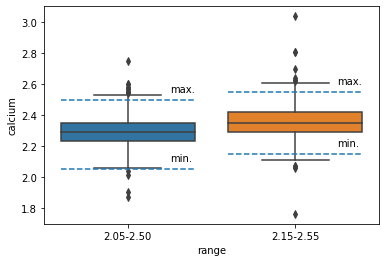

In [16]:
df = pipe.extract_num(df, "calcium", verbose=True)
df = pipe.extract_num(df, 'lactate_dehydrogenase')

def plot_range(data, feat):
    # extract uom and ranges for feat
    sub_data = data.loc[:,feat:].iloc[:,:3]
    sub_range = sub_data.loc[:,sub_data.columns[sub_data.columns.str.contains(pat = 'range')]]
    # plot boxplot for every "range" and corresponding uom
    g = sns.boxplot(x=sub_range.iloc[:,0],y=sub_data[feat])
    # overlay min and max range
    for num, rang in enumerate(sub_range.iloc[:,0].unique()):
        if isinstance(rang, str):
            min_range, max_range = rang.split('-')
            min_range, max_range = float(min_range), float(max_range)
            g.axhline(min_range, xmin=num/2+0.05, xmax=num/2+0.45, ls='--')
            g.axhline(max_range, xmin=num/2+0.05, xmax=num/2+0.45, ls='--')
            g.text(num+0.25,max_range+0.05, "max.")
            g.text(num+0.25,min_range+0.05, "min.")
    


plot_range(df, "calcium")

In [17]:
df[plot_range(df, 'lactate_dehydrogenase']

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-17-489dddcb29c7>, line 1)

In [ ]:
plot_range(df, 'lactate_dehydrogenase')